### Fish Dataset

In [154]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading the data

In [155]:
data_raw=pd.read_csv("Fish.csv")
data_raw.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


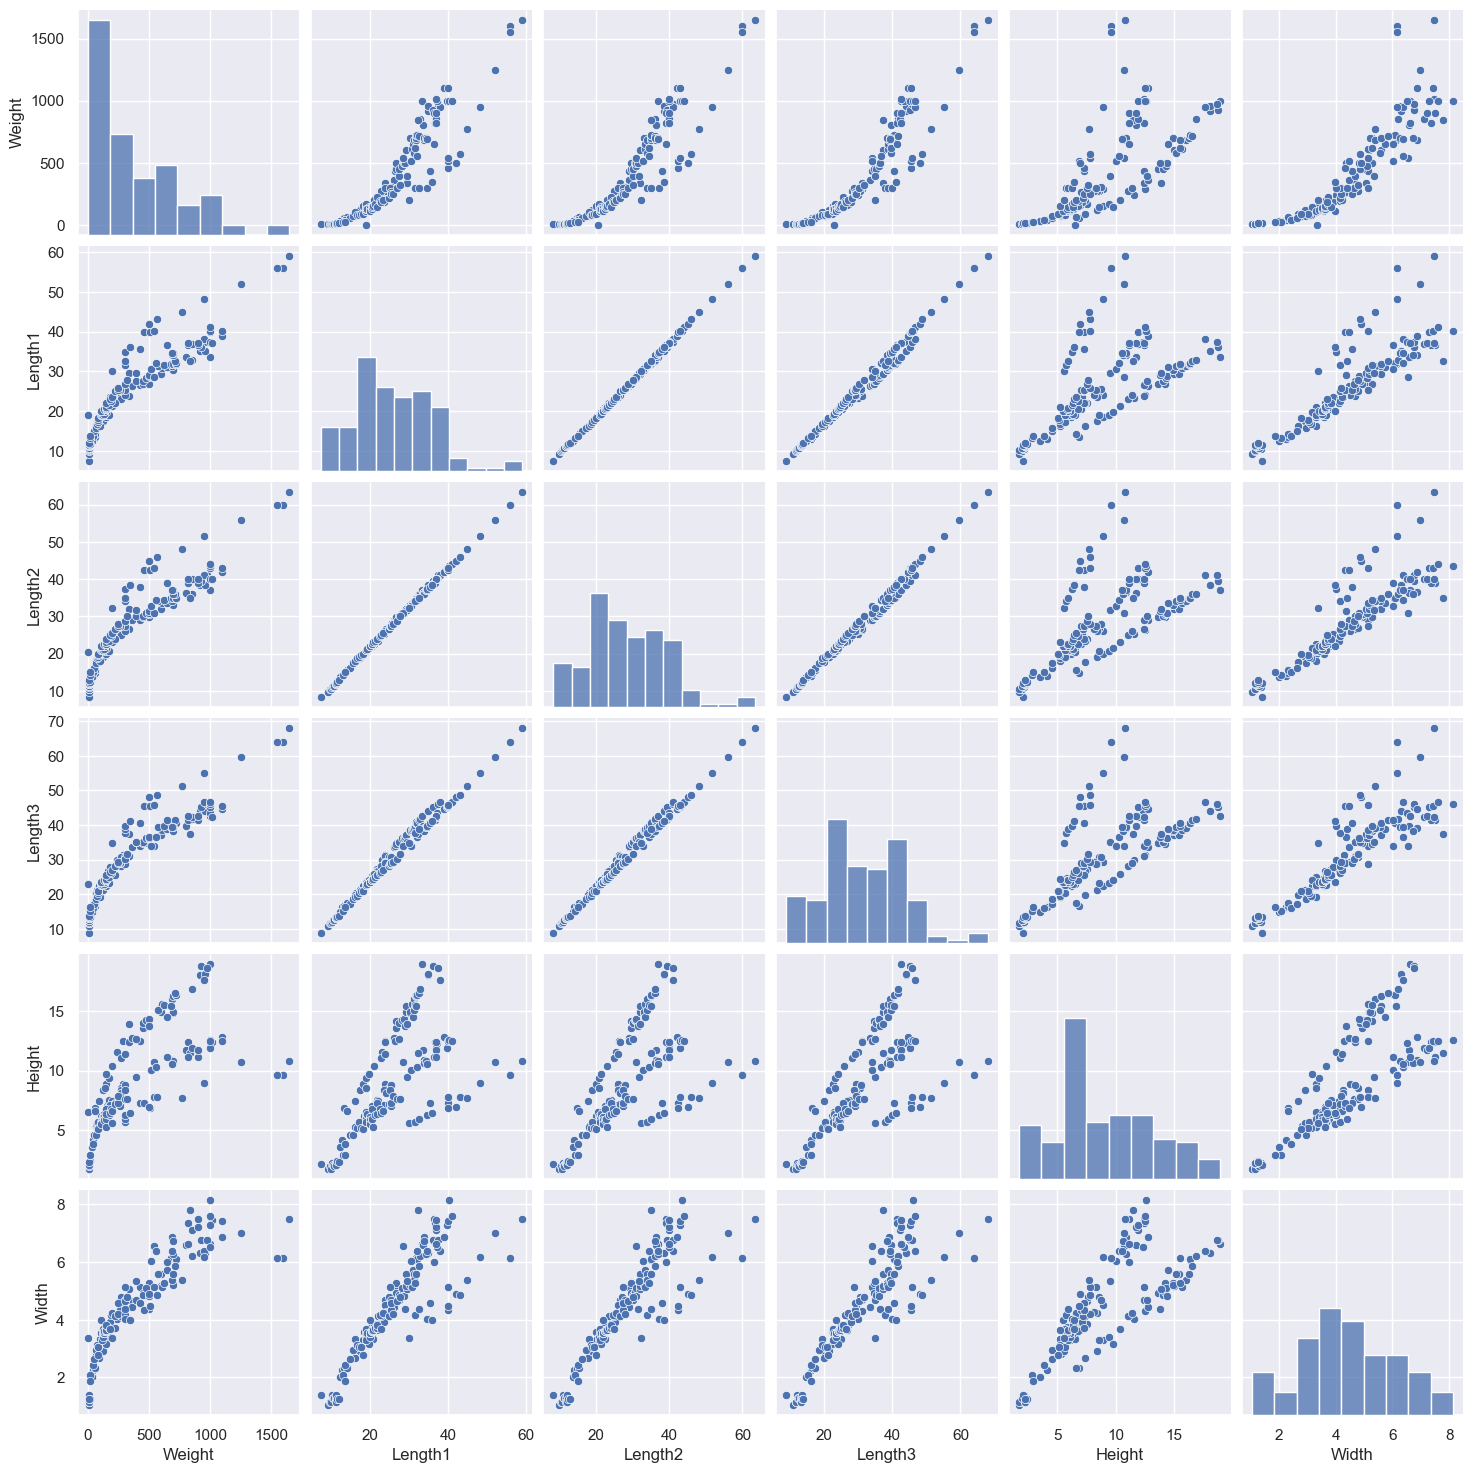

In [156]:
sns.pairplot(data_raw)

In [157]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [158]:
data_raw.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [159]:
data_1=data_raw.drop(["Species"],axis=1)

In [160]:
corr=data_1.corr()

<AxesSubplot:>

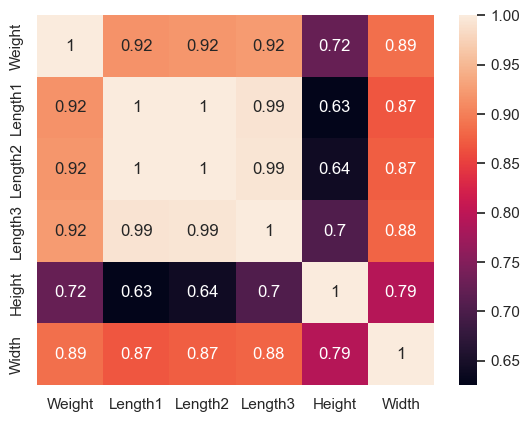

In [161]:
sns.heatmap(corr,annot=True)

In [162]:
data_1.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


## OLS Assumptions

### 1.Linearity

C:\Users\Magesh\AppData\Local\Temp\ipykernel_19532\250116995.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1["Weight"])


<AxesSubplot:xlabel='Weight', ylabel='Density'>

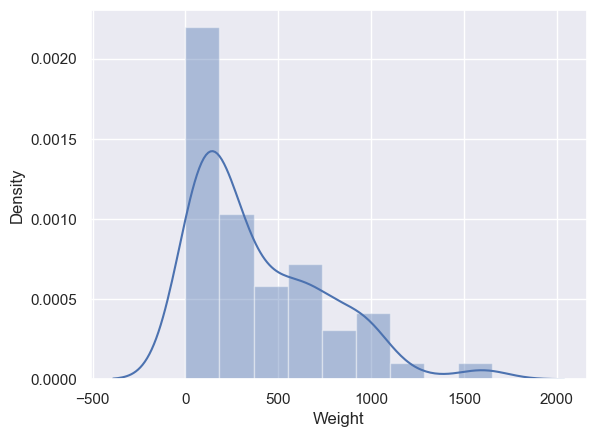

In [163]:
sns.distplot(data_1["Weight"])

In [164]:
q=data_1["Weight"].quantile(0.99)
q

1570.9999999999993

C:\Users\Magesh\AppData\Local\Temp\ipykernel_19532\2145684383.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2["Weight"])


<AxesSubplot:xlabel='Weight', ylabel='Density'>

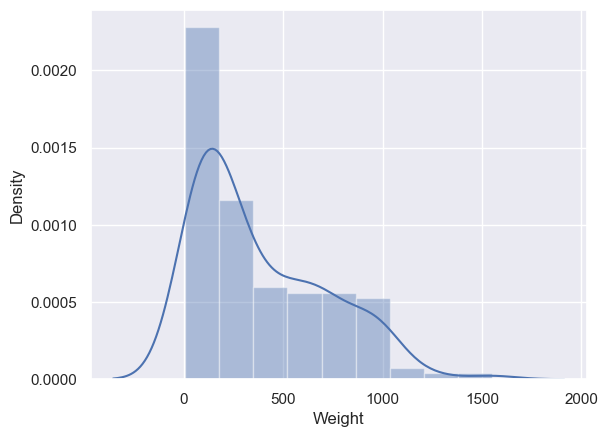

In [165]:
data_2=data_1[data_1["Weight"]<q]
data_2=data_2[data_2["Weight"]>0]
sns.distplot(data_2["Weight"])

C:\Users\Magesh\AppData\Local\Temp\ipykernel_19532\396662769.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data_2["Weight"]))


<AxesSubplot:xlabel='Weight', ylabel='Density'>

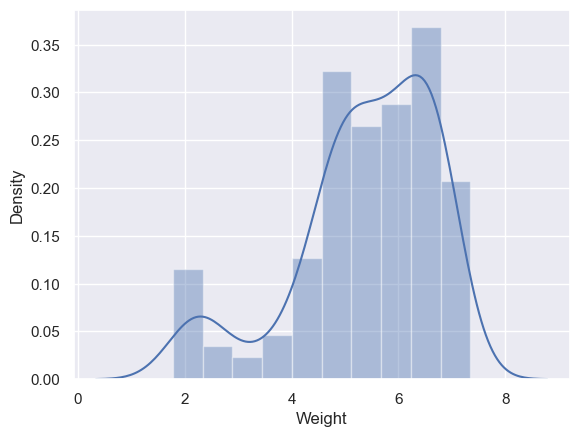

In [166]:
sns.distplot(np.log(data_2["Weight"]))

In [167]:
data_2["log_weight"]=np.log(data_2["Weight"])
data_2.head()

,Weight,Length1,Length2,Length3,Height,Width,log_weight
0,242.0,23.2,25.4,30.0,11.5200,4.0200,5.488938
1,290.0,24.0,26.3,31.2,12.4800,4.3056,5.669881
2,340.0,23.9,26.5,31.1,12.3778,4.6961,5.828946
3,363.0,26.3,29.0,33.5,12.7300,4.4555,5.894403
4,430.0,26.5,29.0,34.0,12.4440,5.1340,6.063785


In [168]:
data_2.describe()

,Weight,Length1,Length2,Length3,Height,Width,log_weight
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,385.153205,25.892949,28.039744,30.835256,8.971159,4.393619,5.384565
std,331.672378,9.421555,10.108602,11.006384,4.320017,1.676095,1.315298
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600,1.774952
25%,120.000000,19.075000,21.000000,23.175000,5.931675,3.390675,4.787492
50%,272.500000,25.100000,27.150000,29.350000,7.733000,4.248050,5.607637
75%,627.500000,32.550000,35.000000,39.525000,12.378550,5.572125,6.441533
max,1550.000000,56.000000,60.000000,64.000000,18.957000,8.142000,7.346010


In [169]:
data_2.columns.values

array(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'log_weight'], dtype=object)

C:\Users\Magesh\AppData\Local\Temp\ipykernel_19532\941729699.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2["Length1"])


<AxesSubplot:xlabel='Length1', ylabel='Density'>

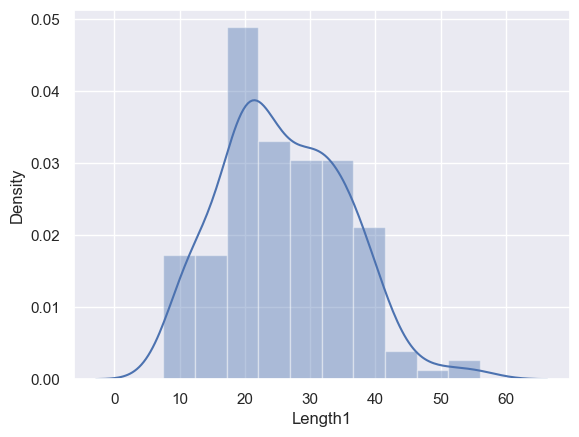

In [170]:
sns.distplot(data_2["Length1"])

C:\Users\Magesh\AppData\Local\Temp\ipykernel_19532\1176716689.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2["Length2"])


<AxesSubplot:xlabel='Length2', ylabel='Density'>

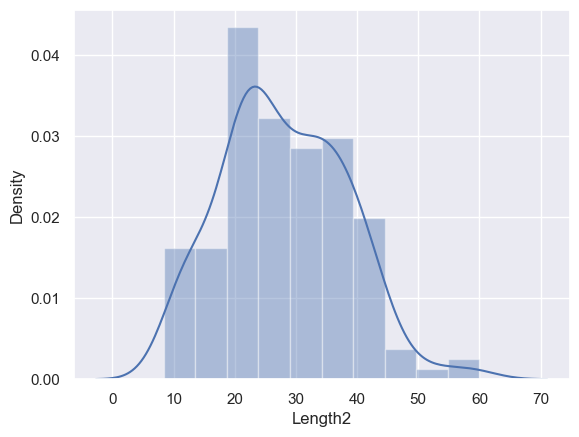

In [171]:
sns.distplot(data_2["Length2"])

C:\Users\Magesh\AppData\Local\Temp\ipykernel_19532\3473712755.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2["Length3"])


<AxesSubplot:xlabel='Length3', ylabel='Density'>

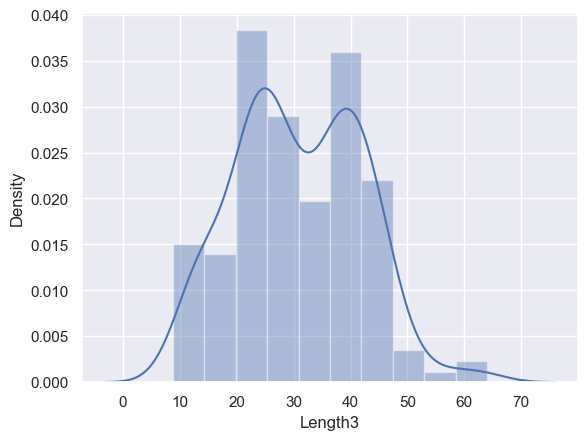

In [172]:
sns.distplot(data_2["Length3"])

C:\Users\Magesh\AppData\Local\Temp\ipykernel_19532\1398019796.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2["Height"])


<AxesSubplot:xlabel='Height', ylabel='Density'>

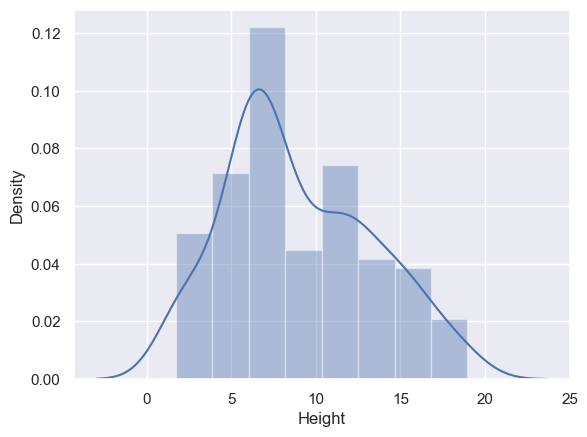

In [173]:
sns.distplot(data_2["Height"])

C:\Users\Magesh\AppData\Local\Temp\ipykernel_19532\3946101982.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2["Width"])


<AxesSubplot:xlabel='Width', ylabel='Density'>

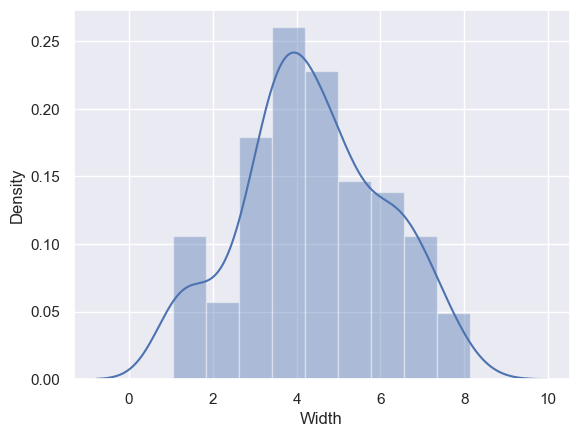

In [174]:
sns.distplot(data_2["Width"])

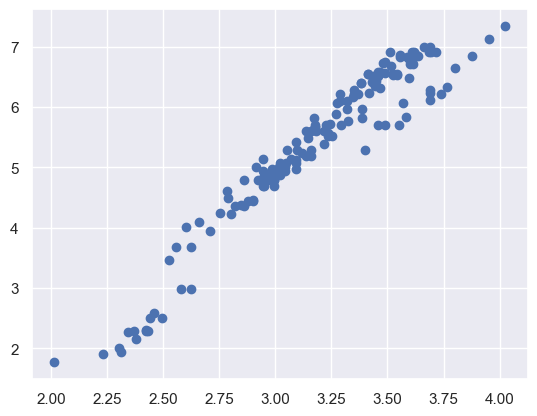

In [175]:
plt.scatter(np.log(data_2["Length1"]),data_2["log_weight"])

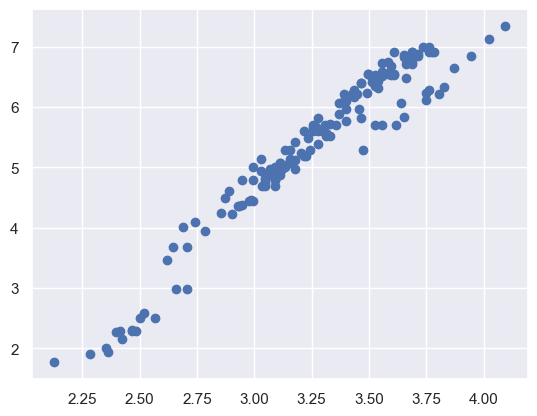

In [176]:
plt.scatter(np.log(data_2["Length2"]),data_2["log_weight"])

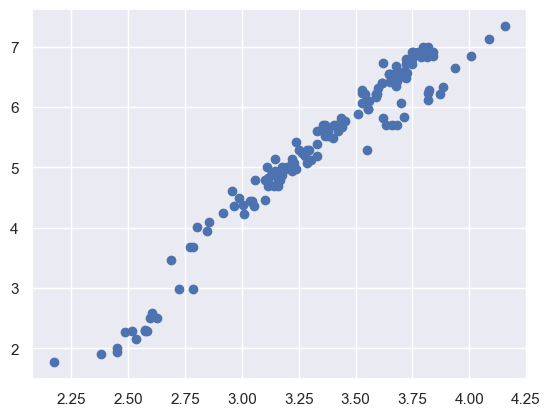

In [177]:
plt.scatter(np.log(data_2["Length3"]),data_2["log_weight"])

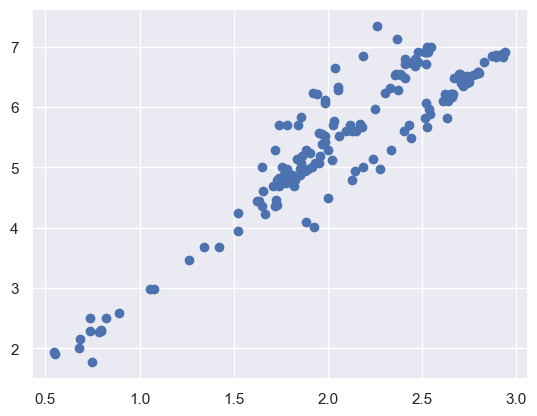

In [178]:
plt.scatter(np.log(data_2["Height"]),data_2["log_weight"])

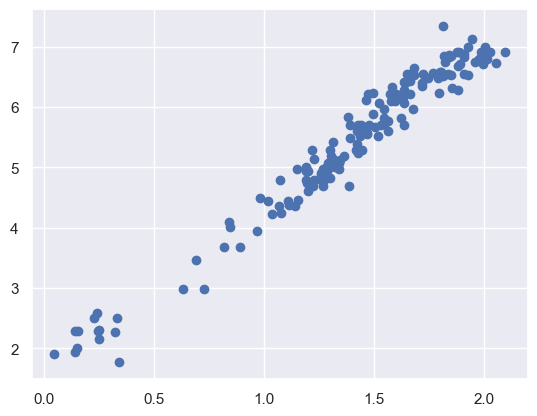

In [179]:
plt.scatter(np.log(data_2["Width"]),data_2["log_weight"])

All the log values have better linear relation than normal values

In [180]:
data_2.head()

,Weight,Length1,Length2,Length3,Height,Width,log_weight
0,242.0,23.2,25.4,30.0,11.5200,4.0200,5.488938
1,290.0,24.0,26.3,31.2,12.4800,4.3056,5.669881
2,340.0,23.9,26.5,31.1,12.3778,4.6961,5.828946
3,363.0,26.3,29.0,33.5,12.7300,4.4555,5.894403
4,430.0,26.5,29.0,34.0,12.4440,5.1340,6.063785


In [181]:
data_2["log_l1"]=np.log(data_2["Length1"])
data_2["log_l2"]=np.log(data_2["Length2"])
data_2["log_l3"]=np.log(data_2["Length3"])
data_2["log_h"]=np.log(data_2["Height"])
data_2["log_w"]=np.log(data_2["Weight"])
data_2.head()


,Weight,Length1,Length2,Length3,Height,Width,log_weight,log_l1,log_l2,log_l3,log_h,log_w
0,242.0,23.2,25.4,30.0,11.5200,4.0200,5.488938,3.144152,3.234749,3.401197,2.444085,5.488938
1,290.0,24.0,26.3,31.2,12.4800,4.3056,5.669881,3.178054,3.269569,3.440418,2.524127,5.669881
2,340.0,23.9,26.5,31.1,12.3778,4.6961,5.828946,3.173878,3.277145,3.437208,2.515905,5.828946
3,363.0,26.3,29.0,33.5,12.7300,4.4555,5.894403,3.269569,3.367296,3.511545,2.543961,5.894403
4,430.0,26.5,29.0,34.0,12.4440,5.1340,6.063785,3.277145,3.367296,3.526361,2.521239,6.063785


### 2. No Endognity is assumed

### 3 . Normality , Zero Mean , Homoscedasticity will be discovered later

### 4 . Auto Correlation is assumed
Because it is not a panel or time series data

### 5 . Multicollinearity

In [182]:
data_2.columns.values

array(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'log_weight', 'log_l1', 'log_l2', 'log_l3', 'log_h', 'log_w'],
      dtype=object)

In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_2[["Height","Length1"]]
## Only these variables we are considering
## Because including any other variables results in multicollinearity
vif=pd.DataFrame()
vif["Features"]=variables.columns
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["VIF"]=vif["VIF"].round(1)
vif

,Features,VIF
0,Height,9.2
1,Length1,9.2


In [193]:
data_preprocessed=data_2[["log_weight","log_h","log_l1"]]

## Regression

In [194]:
from sklearn.linear_model import LinearRegression

In [195]:
y=data_preprocessed["log_weight"]
x=data_preprocessed.drop(["log_weight"],axis=1)

In [196]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [197]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [198]:
reg.score(x_train,y_train)

0.9864570585470614

In [199]:
reg.intercept_

-3.177381522470469

In [200]:
reg.coef_

array([0.9985703 , 2.04448321])

In [204]:
y_pred=reg.predict(x_train)
np.exp(y_pred)

array([ 276.21706599,  758.90311256,  925.16194686,  278.20083094,
        242.47303306,  160.70263471,  114.88689422,  811.76488942,
        535.02691869,   76.96398636,  447.70368217,   67.96846611,
         53.18081467,  745.78912715,  613.37006997,  107.20615538,
        570.87365254,   58.2594836 ,  181.16581149,  985.04871775,
        856.52113191,  792.30082886,  811.97617134,  109.19771121,
        420.02734953, 1197.05094667,  116.12671167,  951.96149422,
        146.04116155,  663.96583127,   13.11434078,  554.5239516 ,
        588.63296679,   13.11434078,  296.3008639 ,  611.43508649,
        142.44959745,  140.57031198,   97.43033345,  881.29964934,
        106.69045131,  252.05788941,  801.33795427,  757.73650566,
        509.19995589,  101.84862302,  112.80358708,    8.1414812 ,
         12.83604499,    6.91885158,  173.9546841 ,  596.17780283,
         62.95313526,   34.05880852, 1271.48967137,    9.10016428,
         10.9782276 ,   92.61291612,   23.37359318,  168.38906

### Error

In [213]:
from sklearn.metrics import mean_squared_error

In [211]:
mse=mean_squared_error(y_train,y_pred)
mse

0.024659437832748814

C:\Users\Magesh\AppData\Local\Temp\ipykernel_19532\2675466352.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<AxesSubplot:xlabel='log_weight', ylabel='Density'>

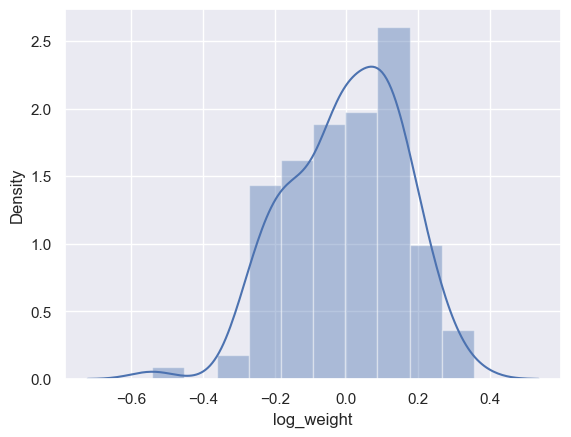

In [215]:
error=y_train-y_pred
sns.distplot(error)

## Predictions

In [216]:
result=pd.DataFrame()
result["Target"]=np.exp(y_train)
result["Predicted"]=np.exp(y_pred)
result

,Target,Predicted
57,306.0,276.217066
139,770.0,758.903113
124,1000.0,925.161947
129,300.0,278.200831
128,200.0,242.473033
...,...,...
72,5.9,5.412009
107,300.0,264.176522
14,600.0,623.995744
93,145.0,121.395567


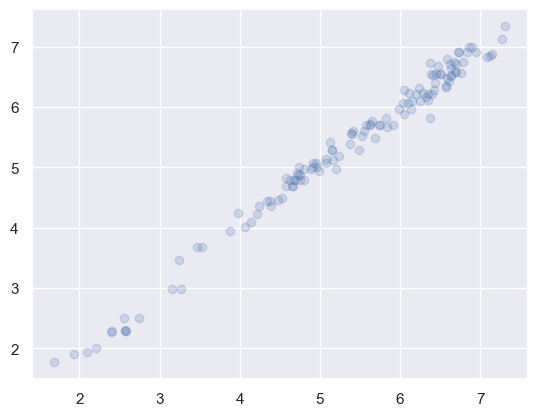

In [217]:
plt.scatter(y_pred,y_train,alpha=0.2)

Our model explains 98% of the population data